### importing core libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2024-07-22 16:52:15.832541: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 16:52:15.832645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 16:52:15.979178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### let's create an imagedatagenerator in order to load images from their respective folders

In [2]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,      
    validation_split=0.25
)

### loading images and splittinh into training and validation sets

In [3]:
dataset_path = '/kaggle/input/fruits-dataset-images/images'
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 270 images belonging to 9 classes.


In [4]:
train_generator.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

In [5]:
validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as training data
)

Found 89 images belonging to 9 classes.


In [6]:
validation_generator.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

### this function returns all the directories of images for the respective fruits

In [7]:
def get_image_paths(folder_path):
    image_extensions = ('.jpg','.JPG', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(image_extensions)]
    return image_paths

apple_folder_path = '/kaggle/input/fruits-dataset-images/images/apple fruit'
images = get_image_paths(apple_folder_path)

apple_paths_ = list()
for image in images:
    apple_paths_.append(image)

### sample images for apple

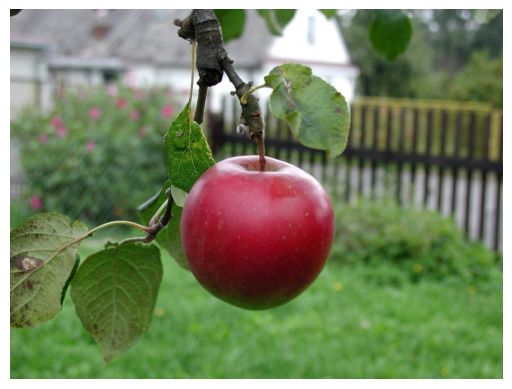

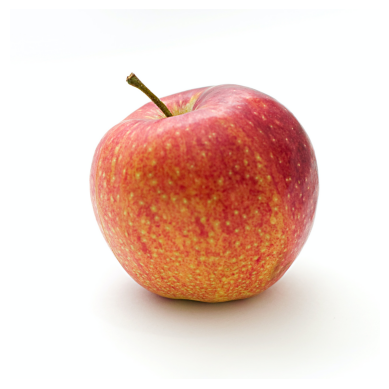

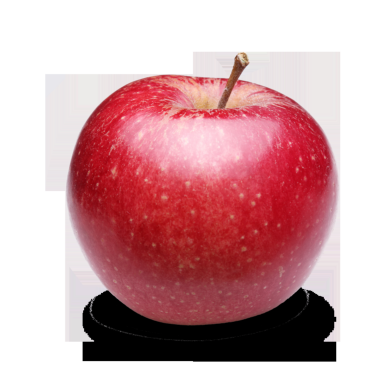

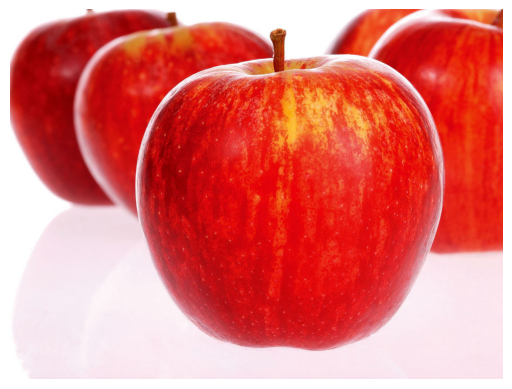

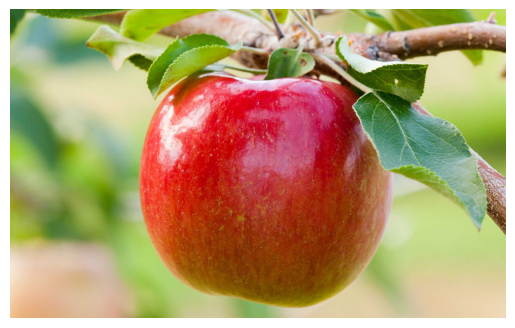

In [8]:
apple_paths_sample = apple_paths_[:5]
for path_ in apple_paths_sample:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for banana

In [9]:
banana_folder_path = '/kaggle/input/fruits-dataset-images/images/banana fruit'
images = get_image_paths(banana_folder_path)

bn_paths_ = list()
for image in images:
    bn_paths_.append(image)

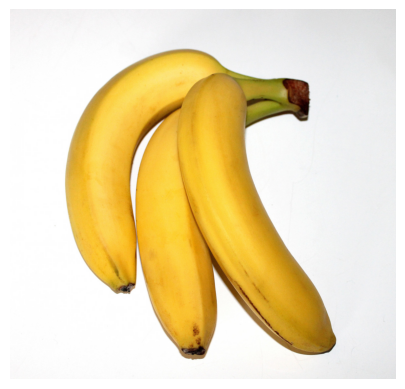

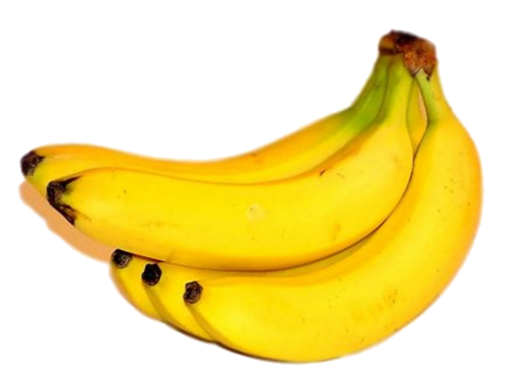

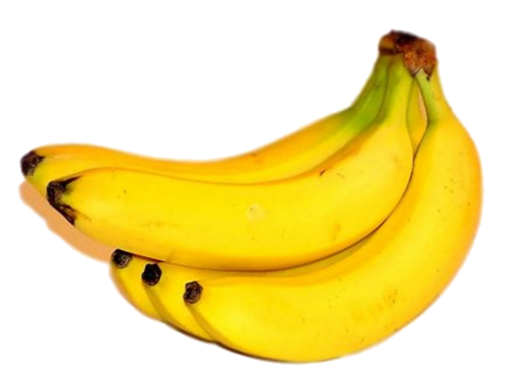

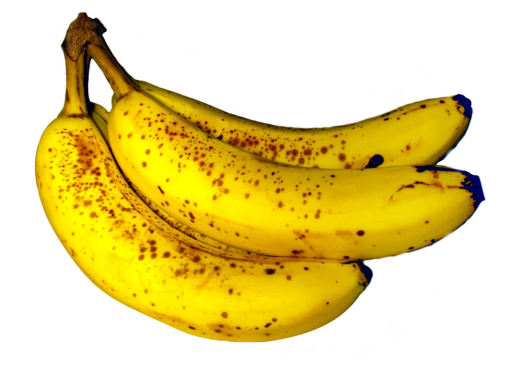

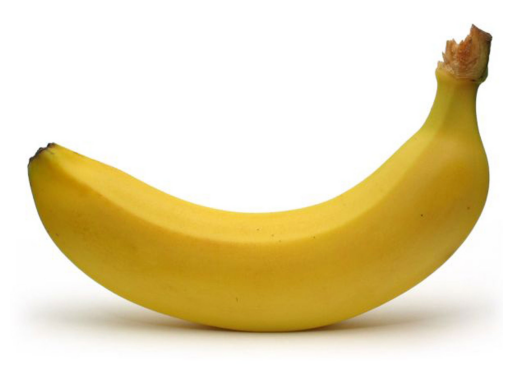

In [10]:
bn_paths_sample = bn_paths_[:5]
for path_ in bn_paths_sample:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for cherry

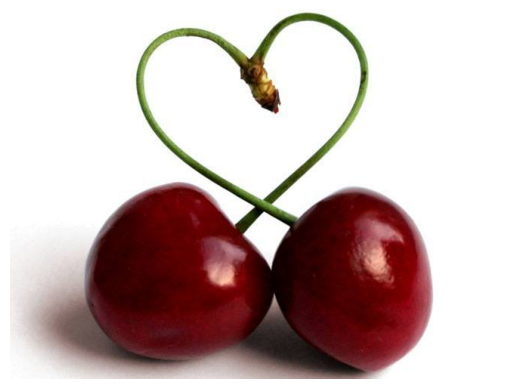

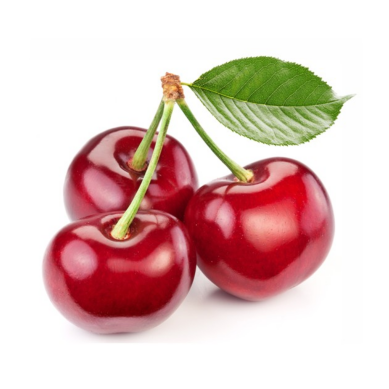

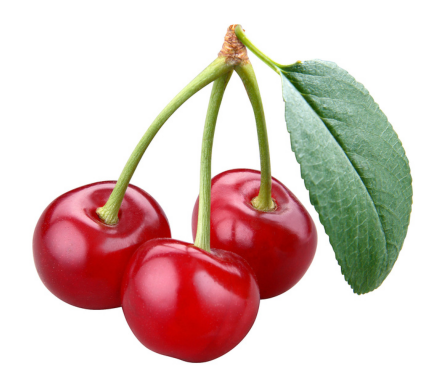

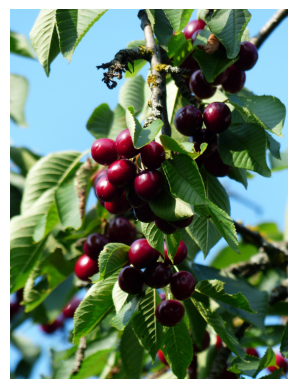

In [11]:
cherry_folder_path = '/kaggle/input/fruits-dataset-images/images/cherry fruit'
images = get_image_paths(cherry_folder_path)

ch_paths_ = list()
for image in images:
    ch_paths_.append(image)
    
for path_ in ch_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for chickoo

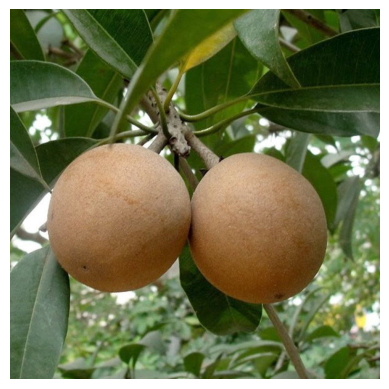

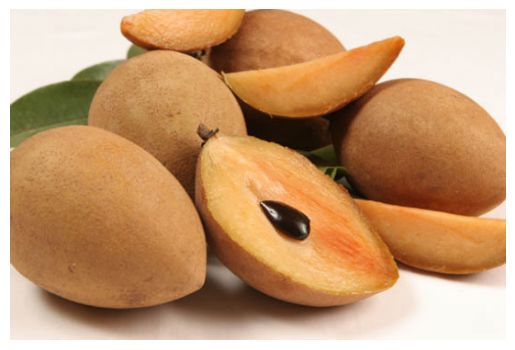

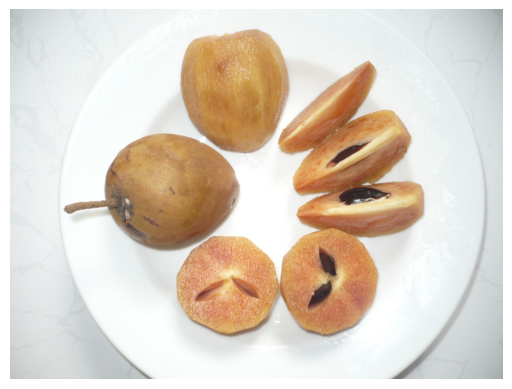

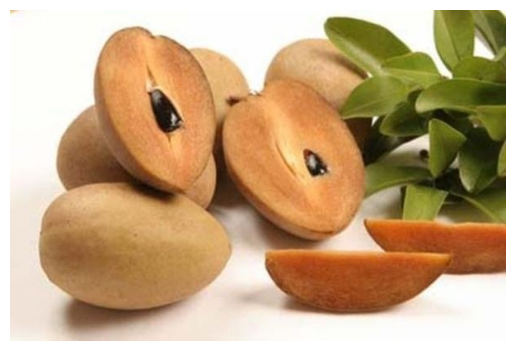

In [12]:
chicko_folder_path = '/kaggle/input/fruits-dataset-images/images/chickoo fruit'
images = get_image_paths(chicko_folder_path)

chk_paths_ = list()
for image in images:
    chk_paths_.append(image)
    
for path_ in chk_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for grapes

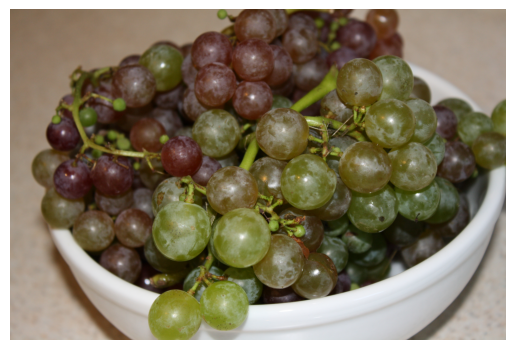

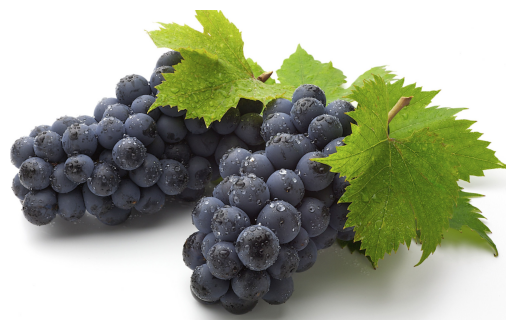

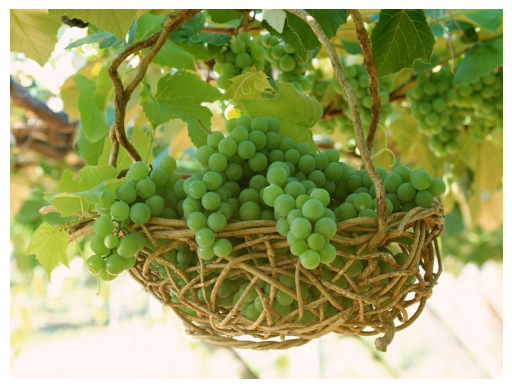

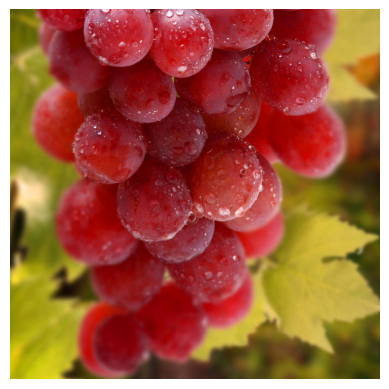

In [13]:
grp_folder_path = '/kaggle/input/fruits-dataset-images/images/grapes fruit'
images = get_image_paths(grp_folder_path)

grp_paths_ = list()
for image in images:
    grp_paths_.append(image)
    
for path_ in grp_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for kiwi

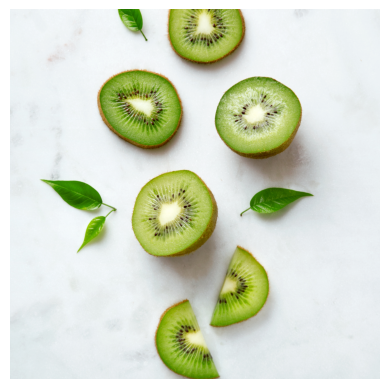

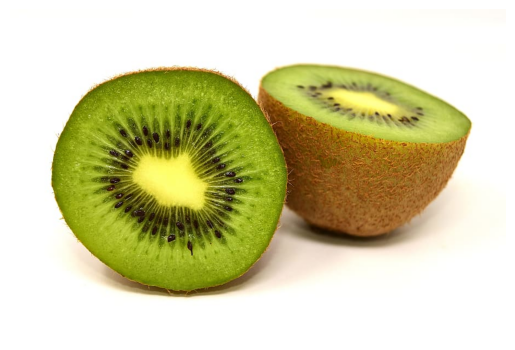

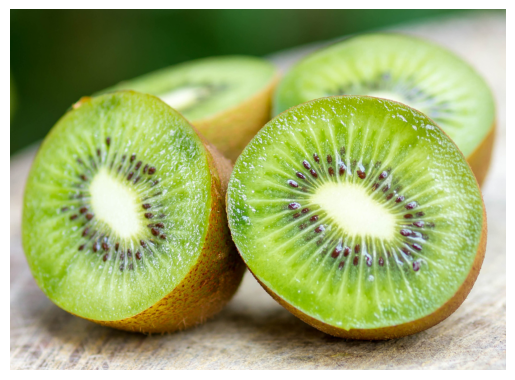

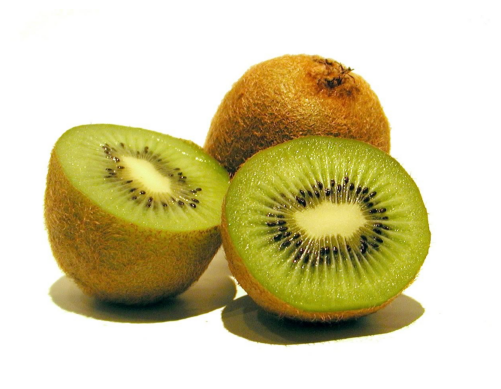

In [14]:
kiwi_folder_path = '/kaggle/input/fruits-dataset-images/images/kiwi fruit'
images = get_image_paths(kiwi_folder_path)

kw_paths_ = list()
for image in images:
    kw_paths_.append(image)
    
for path_ in kw_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for mango

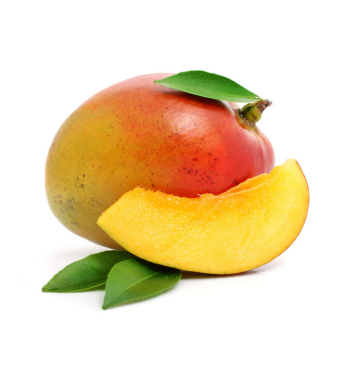

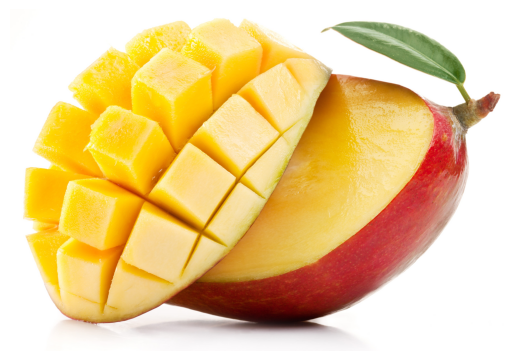

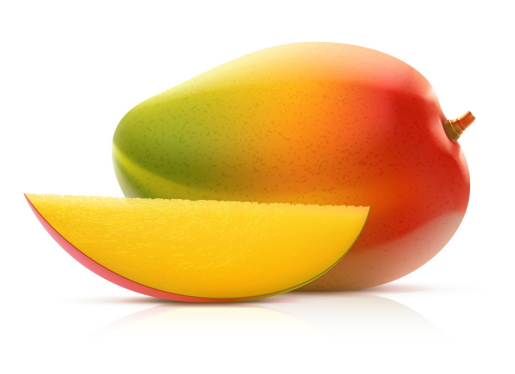

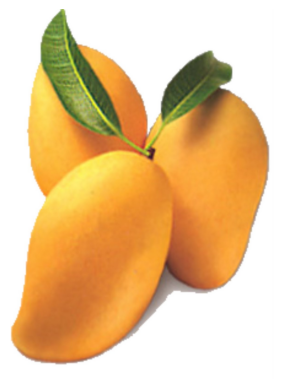

In [15]:
mango_folder_path = '/kaggle/input/fruits-dataset-images/images/mango fruit'
images = get_image_paths(mango_folder_path)

mng_paths_ = list()
for image in images:
    mng_paths_.append(image)
    
for path_ in mng_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for orange

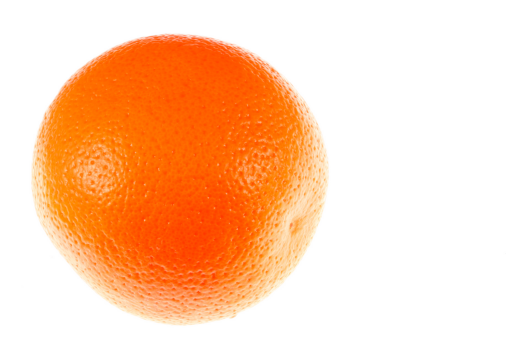

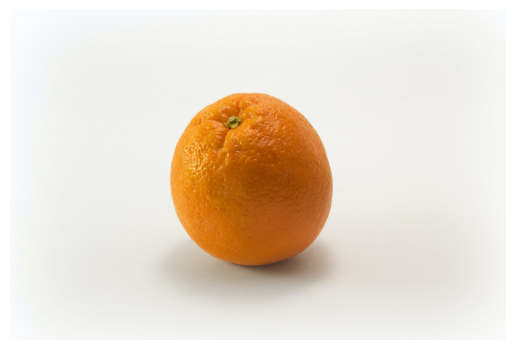

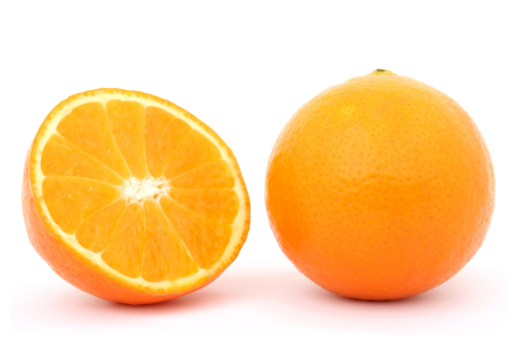

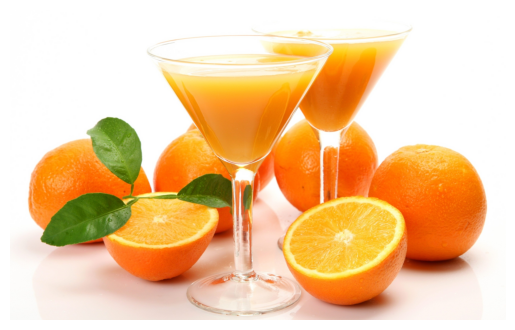

In [16]:
orang_folder_path = '/kaggle/input/fruits-dataset-images/images/orange fruit'
images = get_image_paths(orang_folder_path)

orang_paths_ = list()
for image in images:
    orang_paths_.append(image)
    
for path_ in orang_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### sample images for strawberry

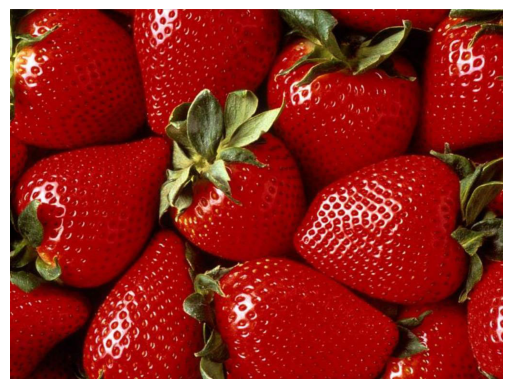

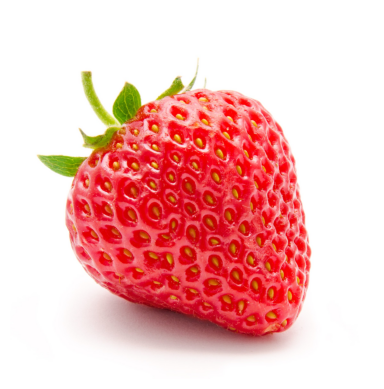

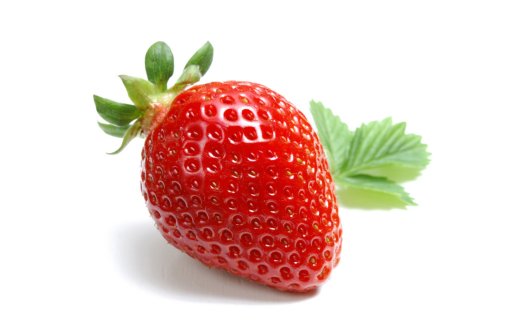

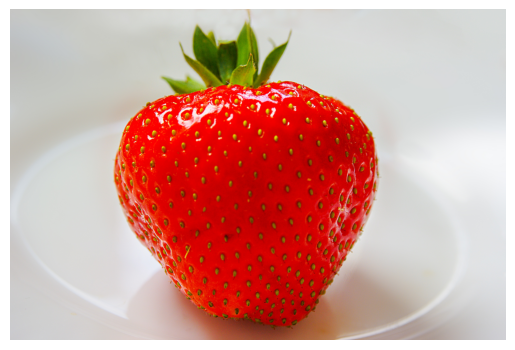

In [17]:
stw_folder_path = '/kaggle/input/fruits-dataset-images/images/strawberry fruit'
images = get_image_paths(stw_folder_path)

stw_paths_ = list()
for image in images:
    stw_paths_.append(image)
    
for path_ in stw_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### loading and finetuning inceptionV3 model

In [18]:
premodel = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=max)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### freezing its layers

In [19]:
for layer in premodel.layers:
    layer.trainable = False

### model building

In [20]:
model = Sequential([
    premodel,
    Flatten(),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

In [21]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [22]:
hist = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1/9 ━━━━━━━━━━━━━━━━━━━━ 4:04 31s/step - accuracy: 0.2143 - loss: 2.6660

I0000 00:00:1721667279.728581     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721667279.785211     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.2354 - loss: 12.2078 - val_accuracy: 0.4944 - val_loss: 6.2599
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 490ms/step - accuracy: 0.8077 - loss: 2.0189 - val_accuracy: 0.7416 - val_loss: 1.9791
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 514ms/step - accuracy: 0.9103 - loss: 0.8224 - val_accuracy: 0.8202 - val_loss: 1.1301
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 517ms/step - accuracy: 0.9631 - loss: 0.1655 - val_accuracy: 0.8876 - val_loss: 0.6735
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 631ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8652 - val_loss: 0.8319
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 543ms/step - accuracy: 1.0000 - loss: 4.9433e-04 - val_accuracy: 0.8427 - val_loss: 0.8351
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 585ms/step - accuracy: 1.0000 - loss: 3.0342e-04 - val_accuracy: 0.8427 - val_loss: 0.7872
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 592ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8427 - val_lo

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │       460,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,185,213 (88.44 MB)

 Trainable params: 460,809 (1.76 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 921,620 (3.52 MB)

### performing prediction

In [24]:
classes_ = validation_generator.class_indices

In [25]:
classes_

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

In [26]:
img = tf.keras.utils.load_img(path='/kaggle/input/fruits-dataset-images/images/apple fruit/Image_1.jpg',target_size=(224,224))
img_arr = tf.keras.utils.array_to_img(img)
img_batch = tf.expand_dims(img_arr,0)

In [30]:
pred = model.predict(img_batch)
score = tf.nn.softmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
fruits = ['apple fruit': 0,
 'banana fruit',
 'cherry fruit',
 'chickoo fruit',
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit]

In [32]:
score

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.2536117 , 0.09329855, 0.09329855, 0.09329855, 0.09329855,
        0.09329855, 0.09329855, 0.09329855, 0.09329855]], dtype=float32)>

In [36]:
for key, val in classes_.items():
    if val == np.argmax(score):
        print(key)

apple fruit


### saving the model

In [37]:
model.save('fruits.keras')